Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import os

Read all pred csv files

In [20]:
dfs = []
for i in os.listdir("Submission_files"):
    df = pd.read_csv("./Submission_files/" + i)
    df["file"] = [i.split("_")[1]] * len(df)
    dfs.append(df)

Combine all the above files

In [21]:
combined_df = pd.concat(dfs)
combined_df

,transcript_id,transcript_position,score,file
0,ENST00000000233,244,0.029629,A549
1,ENST00000000233,261,0.015825,A549
2,ENST00000000233,316,0.235871,A549
3,ENST00000000233,332,0.417208,A549
4,ENST00000000233,368,0.170426,A549
...,...,...,...,...
1446017,R2_7_2,1174,0.573344,MCF7
1446018,R2_7_2,1537,0.004108,MCF7
1446019,R2_7_2,1543,0.000092,MCF7
1446020,R2_7_2,1604,0.003175,MCF7


Plot Graph

[Text(0.5, 1.0, 'Position of m6a modification'), Text(0, 0.5, 'Cell Line')]

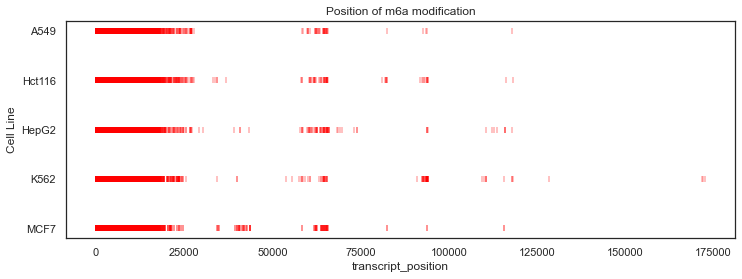

In [29]:
sns.set(rc={'figure.figsize':(12,4)})
sns.set(style="white")
sns.scatterplot(data=combined_df[combined_df["score"] >= 0.5], x='transcript_position', y='file', marker='|', color='red').set(title="Position of m6a modification", ylabel="Cell Line")